In [ ]:
# INTRODUCTION: 

## Cleaning a Diabetes Dataset Using Python in Jupyter Notebook

    In the vast landscape of data science and machine learning, the preprocessing and cleaning of datasets are crucial steps that often lay the foundation for the effectiveness of subsequent analytical models. When dealing with a diabetes dataset, which typically contains historical medical records and patient health indicators, ensuring the data's integrity is paramount. 
    A clean dataset can significantly enhance the model's ability to make accurate predictions and provide valuable insights into managing and preventing diabetes.

## The Importance of Data Cleaning
    Data cleaning involves detecting and correcting (or removing) corrupt or inaccurate records from a dataset, making it suitable for analysis. It's a critical process in data preparation that includes handling missing values, removing duplicates, correcting inconsistent entries, and standardizing data formats. For a diabetes dataset, this might involve ensuring that all measurements are in consistent units, removing records with incomplete or irrelevant information, and dealing with outliers that do not represent typical cases.
    
 # Step-By-Step guide to cleaning data using Python in this work includes;
      1. Import necessary libraries
      2. Load dataset
      3. Inspect the data
      4. Rename columns 
      5. Remove duplicate
      6. Check and correct the categotical column
      7. Handle Missing values
      8. Check for Outliers
      9. Save cleaned data

In [1]:
# 1. Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# 2. Load dataset
df = pd.read_excel("diabetes_unclean.xlsx")

In [3]:
# 3. Inspect the data
# Before cleaning the dataset,it's important to understand what you are working with.
# Display the first few rows of the Dataframe
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [4]:
# Get the size of the Dataframe
print(df.shape)

(1009, 14)


In [ ]:
## Interpretation
### The DataFrame has 1009 Rows and 14 Columns

In [5]:
# Get infromation about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1009 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [ ]:
## Interpretation
#  The result shows that, all of the observations are numerical (float) except Gender and Class.

In [6]:
# 4. Rename the incorrect Column names e.g ('No_Pation' to 'Patients_No')
df.rename(columns={"No_Pation":"Patient_No"}, inplace=True)

In [7]:
# To confirm the changes
df.head()

,ID,Patient_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
#### Interpretation
    The column name changed fron No_Pation to Patien_No. That's how to change the name of a column.

In [8]:
# 5. Remove duplicate
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1004    False
1005    False
1006    False
1007    False
1008    False
Length: 1009, dtype: bool

In [9]:
df.duplicated().sum()

0

In [ ]:
## Interpretation
##  The result of the code above shows that, there is no duplicate value in the Dataframe.

In [10]:
# 6. Check and correct the categotical column (Gender)
df.groupby("Gender")["Gender"].agg("count")

Gender
F    437
M    570
f      2
Name: Gender, dtype: int64

In [ ]:
#### Interpretation
    Result above shows that typing error occur during the data entering. 
    Insteat of capital letter "F", small letter "f" was entered in two places.

In [11]:
# Solution
df["Gender"] = df["Gender"].str.replace("f", "F")

In [12]:
# To confirm
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [13]:
df.groupby("Gender")["Gender"].agg("count")

Gender
F    439
M    570
Name: Gender, dtype: int64

In [14]:
# Check and correct the categotical column (CLASS)
df.groupby("CLASS")["CLASS"].agg("count")

CLASS
N     102
N       1
P      53
Y     840
Y      13
Name: CLASS, dtype: int64

In [ ]:
## Interpretation
# Result above shows that typing error occur during the data entering. 
# So, I need to check why did I have two "Ns" and two "Ys"

In [15]:
df["CLASS"].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [ ]:
## The result shows that, there is space in the apostrophes of one 'Y 'and 'N ', 
while there is no space in the apostrophes of the actual 'N' and 'Y'.

In [16]:
# To correct this mistake
df["CLASS"] = df["CLASS"].str.replace("N ", "N")
df["CLASS"] = df["CLASS"].str.replace("Y ", "Y")

In [17]:
df["CLASS"].unique()

array(['N', 'P', 'Y'], dtype=object)

In [18]:
# To confirm
df.groupby("CLASS")["CLASS"].agg("count")

CLASS
N    103
P     53
Y    853
Name: CLASS, dtype: int64

In [19]:
# 7. Handle Missing values
df.isnull().sum()

ID            0
Patient_No    0
Gender        0
AGE           1
Urea          1
Cr            2
HbA1c         3
Chol          2
TG            2
HDL           1
LDL           2
VLDL          1
BMI           0
CLASS         0
dtype: int64

In [ ]:
## Interpretation
### The result above shows the how many observations missed in each column of the DataFrame.
    #### In this work, I will be using two methods to solve the problem.
        1. Mean imputation method
        2. Deletion method.
        
   ### NOTE: 
 ### I will like to use Mean Imputation method to solve the problem in column {HbA1c} because it has the highest number of 
    missing value

In [20]:
# Mean Imputation Method
mean_value = df["HbA1c"].mean()

In [21]:
mean_value

8.284155069582505

In [22]:
# Use the mean value obtained to fill the missing value in column HbA1c
df["HbA1c"].fillna(mean_value, inplace = True)

In [23]:
# To confirm
df.isnull().sum()

ID            0
Patient_No    0
Gender        0
AGE           1
Urea          1
Cr            2
HbA1c         0
Chol          2
TG            2
HDL           1
LDL           2
VLDL          1
BMI           0
CLASS         0
dtype: int64

In [ ]:
## Problem solved. The number of missing value in column HbA1c from 3 is now 0.

In [24]:
## Using Deletion Method
df1 = df.dropna()

In [25]:
# Confirm the result
df1.isnull().sum()

ID            0
Patient_No    0
Gender        0
AGE           0
Urea          0
Cr            0
HbA1c         0
Chol          0
TG            0
HDL           0
LDL           0
VLDL          0
BMI           0
CLASS         0
dtype: int64

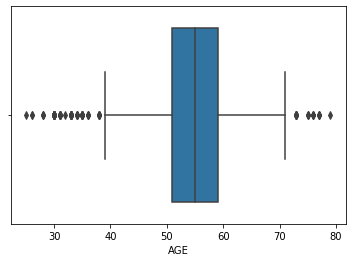

In [26]:
## 8. Check for Outliers using Boxplot method
## I am checking outliers in numerical data.
sns.boxplot(df1["AGE"])

In [ ]:
### Based on the outcome above, the boxplot show that, there is no outlier in Age column.

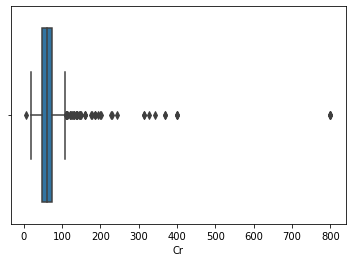

In [27]:
sns.boxplot(df1["Cr"])

In [ ]:
### Based on the outcome above, the boxplot show that, there is outlier in Cr column.

In [28]:
## To solve the problem using the maximum quantile
max_value = df1["Cr"].quantile(0.995)

In [29]:
max_value

401.0

In [31]:
df1[df1["Cr"] > max_value]

,ID,Patient_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
273,1,34325,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
283,266,24060,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
846,1,34325,M,56.0,20.8,800.0,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
860,19,51623,M,60.0,20.8,800.0,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Y


In [32]:
# Assigning the new data to a new dataframe
df2 = df1[df1["Cr"] < max_value]

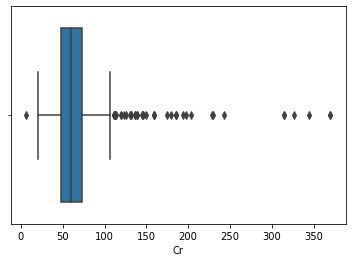

In [33]:
sns.boxplot(df2["Cr"])

In [34]:
## 9. Save cleaned data
df2.to_csv("Clenaed Dataset")